In [238]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from scipy.misc import comb

It is well known that Lagrande interpolation with equally spaced nodes is susceptible to the so-called *Runge phenomenon*. In this exercise, you are asked to do some reading to familiarize yourself with this phenomenon, and illustrate the phenomenon by a well chosen numerical experiment. The design of the experiment, and how you showcase it are entirely up to you, with the only requirement being that you need to show some originality. In particular the standard example f(x) = 1/(1+x^2) and its close relatives should not be used. You are not required to provide a rigorous mathematical proof that your example indeed exhibits the Runge phenomenon.

I chose to implement Weierstrass's function, which is known to be continuous everywhere but differentiable nowhere. I think I dont have enough computing ppower to push Bezier curves far enough to get a good approzimation, but the implementation with Chebishev nodes gives an interesting result, and we can see that with equally spaced node the overshoot in Lagrange interpolation is really huge (graph 1).

Weierstrass's function :
f(x)=sum{n=0}[a^{n}cos(b^{n}pix)]

In [239]:
def f(x):
    #continuous function on [-1,1]
    a=0.8
    b=7
    y=0
    for i in range (10):
        y+=pow(a,i)*math.cos(pow(b,i)*math.pi*x)
    return y

Part a) : Perform Lagrange interpolation with equally spaced nodes to illustrate the Runge phenomenon.

In [240]:
def Lagrange(nx, nn, nodelist, xlist, ylist):
    #performs Lagrange interpolation on an interval xlist and for nn nodes
    ylist = [0 for x in range (nx)]
    for k in range(nx) : #for each x value
        somme=0 #initializing
        for i in range(nn): 
            prod=1 #initializing
            for j in range (nn): #compute Lagrange interpolation
                if j!=i :
                    prod=prod*(xlist[k]-nodelist[j])/(nodelist[i]-nodelist[j])
                else :
                    prod=prod*1
            somme=somme+(prod*f(nodelist[i]))
        ylist[k]=somme #assign f(x) to y
    return ylist

Part b): Perform Lagrange interpolation with Chebyshev nodes on the same examples, in order to see how Chebyshev nodes compare to equally spaced nodes. You need to find out what Chebyshev nodes are, in case you are not familiar with them.

In [241]:
def Chebyshev(nn):
    #finds coordinates of Chebishev nodes for nn - number of nodes
    nodelist =[float(0.) for x in range (nn)] #initializing
    for i in range(nn):#print i#debug
        nodelist[i]=math.cos(math.pi*(2*(i+1)-1)/(2*nn))#print node#debug
    return nodelist

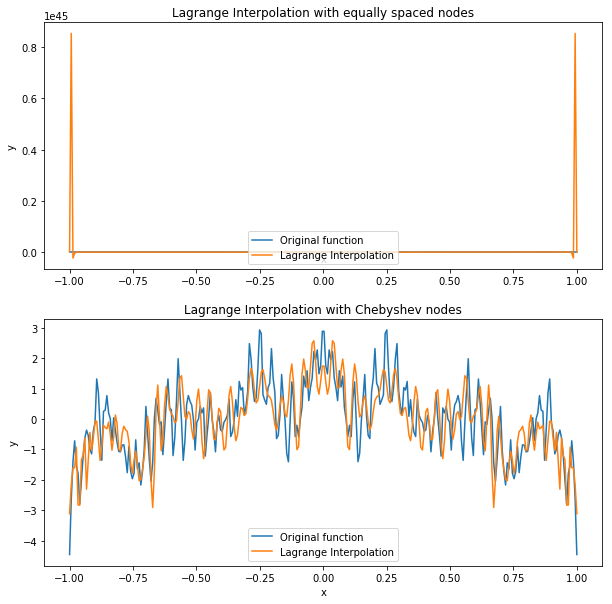

In [248]:
fig = plt.figure(figsize=(10,10)) #graph setup
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

nx=300 #number of x values - curve resolution
nn=170 #number of nodes
xlist = np.linspace(-1, 1, nx)#initializing x values
nodelist = np.linspace(-1,1,nn) #initializing node's x coordinates
flist = [0 for x in range (nx)] #initializing
ylist = []

for i in range (nx):#computing f(x) for each x values
    flist[i]=f(xlist[i])
ax1.plot(xlist,flist,label='Original function')
ax2.plot(xlist,flist,label='Original function')

ylist=Lagrange(nx, nn, nodelist, xlist, ylist) #computing Lagrange interpolation with equally spaced nodes
ax1.plot(xlist,ylist,label='Lagrange Interpolation')

nodelist=Chebyshev(nn) #computing Chebishev nodes
ylist=Lagrange(nx, nn, nodelist, xlist, ylist) #computing Lagrange interpolation with Chebishev nodes
ax2.plot(xlist,ylist,label='Lagrange Interpolation')

plt.legend()                                                             #more graph setup - no math relevance
ax1.set_title(r'Lagrange Interpolation with equally spaced nodes')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="lower center")
ax2.set_title(r'Lagrange Interpolation with Chebyshev nodes') 
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc="lower center")
plt.show()

Part c) Compute the Bernstein polynomials (obviously with equally spaced nodes) on the same examples, to see how this approach compares to interpolation.

In [243]:
def Bezier(nn, i, bxlist, plist):
    #compute Bezier curve using Bernstein polynomial and plist - list of control points
    blist = [0 for x in range (nx)] #initializing
    for k in range (nx): # for each x value
        x=bxlist[k] #dummy variable
        somme=0 #initializing
        for i in range (nn+1): #for each control point - degree
            somme+=(comb(nn,i)*pow(x,i)*pow(1-x,nn-i)*plist[i]) #computes bernstein polynomial of degree i * pi
                                                                # pi - control point coordinate, x or y
        blist[k]=somme
    return blist

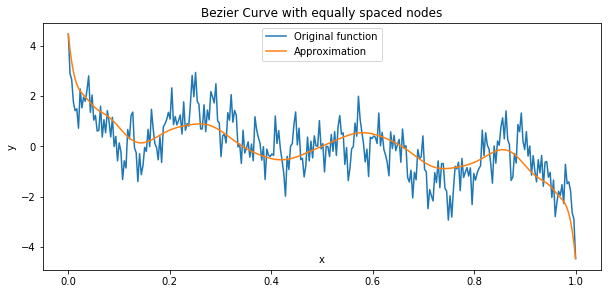

In [250]:
fig = plt.figure(figsize=(10,10)) #graph setup
ax1 = fig.add_subplot(211)

nx=300 #number of x values - curve resolution
nn=170 #number of control points
bxlist = np.linspace(0, 1, nx) #initializing x values
xplist = np.linspace(0, 1, nn+1)#initializing control point's x coordinates
flist = [0 for x in range (nx)] #initializing
yplist = [0 for x in range (nn+1)]

for i in range (nn+1): #computing y coordinates for each control point - y=f(x)
    yplist[i]=f(xplist[i])

for i in range (nx):#computing f(x) for each x values
    flist[i]=f(bxlist[i])
ax1.plot(bxlist,flist,label='Original function')

xblist=Bezier(nn, i, bxlist, xplist)#computing B(t)x Bezier curve 
yblist=Bezier(nn, i, bxlist, yplist)#computing B(t)y       
ax1.plot(xblist, yblist, label='Approximation') 

plt.legend()                                                     #more graph setup - no math relevance
ax1.set_title(r'Bezier Curve with equally spaced nodes')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
plt.show()